<a href="https://colab.research.google.com/github/retico/cmepda_medphys/blob/master/L1_code/Lecture1_demo1_read_DICOM_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading the dataset from Google Drive
Prior to this operation be sure to have added the shared folder to your Google Drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!ls "/content/drive/My Drive/cmepda_medphys_dataset"

FEATURES  IMAGES


In [0]:
DATASETS = "/content/drive/My Drive/cmepda_medphys_dataset"

# Working with DICOM files

In [0]:
%matplotlib inline

`%matplotlib inline` 
is a ‘magic functions’ which sets the backend of matplotlib to the 'inline' backend. It allows to display  the output of plotting commands inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

## Demo 1: reading a DICOM file using the pydicom package

This example illustrates how to use the pydicom package to open a DICOM file, print some dataset information (metadata), and show images using matplotlib.

Find the documentation and the installation instructions at 
https://pydicom.github.io/pydicom/stable/

You can create and work in an enviroment with python 3 and the numpy library, which is required to manipulate pixel data

In [19]:
!pip install pydicom

In [0]:
import os
import pydicom
import matplotlib.pyplot as plt

In [0]:
filename = os.path.join(DATASETS, "IMAGES", "DICOM_Examples", "Brain_MRI", "IM67_1slice.dcm")
dataset = pydicom.dcmread(filename)

The `dcmread` function returns a *FileDataset* object, which makes accessible the metadata contained in the DICOM header and the image as numpy array.

In [22]:
print(type(dataset))

<class 'pydicom.dataset.FileDataset'>


Images are NumPy arrays

In [23]:
print(type(dataset.pixel_array))

<class 'numpy.ndarray'>


In [24]:
# to show the dataset content you can just type dataset 
dataset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.4365715539284982230698868930013138318
(0008, 0020) Study Date                          DA: '20170217'
(0008, 0021) Series Date                         DA: '20170217'
(0008, 0022) Acquisition Date                    DA: '20170217'
(0008, 0023) Content Date                        DA: '20170217'
(0008, 0030) Study Time                          TM: '181812'
(0008, 0031) Series Time                         TM: '183301'
(0008, 0032) Acquisition Time                    TM: '183302'
(0008, 0033) Content Time                        TM: '183302'
(0008, 0050) Accession Number                    SH: '7-1-12304'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer          

In [25]:
# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
display_name = ','.join([pat_name.family_name, pat_name.given_name])
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)



Filename.........: /content/drive/My Drive/cmepda_medphys_dataset/IMAGES/DICOM_Examples/Brain_MRI/IM67_1slice.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: Maria Bianchi,
Patient id.......: 1234
Modality.........: MR
Study Date.......: 20170217
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: ['0.5', '0.5']


In [26]:
# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

Slice location...: 32.98758698


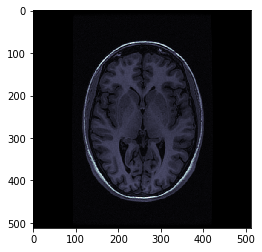

In [27]:
# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()